# Power Plant Emissions
### Exploratory Data Analysis

In this notebook, I'll examine 2023 emissions data for various plants across the US. Data is provided by the EPA through the Clean Air Markets Program. To access this data, follow these steps:

1. Navigate to https://campd.epa.gov/
2. Select "Start your data query"
3. Choose "Bulk Data Files"
4. Filter for Bulk Data Type: Emissions, Subtype: Daily, Grouping: State

In this notebook, we'll look at the emissions data for California. Download `emissions-daily-<year>-ca.csv` for all the available years. As of writing, these are 1997-2024, inclusive. Place these files in a directory `data/emissions` or modify the path below as appropriate.

In [1]:
# Load in packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features_of_interest = ["CO2 Mass (short tons)", "CO2 Rate (short tons/mmBtu)", "SO2 Mass (short tons)", "SO2 Rate (lbs/mmBtu)", "NOx Mass (short tons)", "NOx Rate (lbs/mmBtu)"]

In [3]:
# Read in the data
df_list = []
for i in range(1997, 2025):
    df_list.append(pd.read_csv(f"data/emissions/emissions-daily-{i}-ca.csv"))
df = pd.concat(df_list)

/var/folders/y0/gt3knk2d0_j2616pky_vwf51r1z8f_/T/ipykernel_91040/98980908.py:4: DtypeWarning: Columns (4,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(f"data/emissions/emissions-daily-{i}-ca.csv"))
/var/folders/y0/gt3knk2d0_j2616pky_vwf51r1z8f_/T/ipykernel_91040/98980908.py:4: DtypeWarning: Columns (4,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(f"data/emissions/emissions-daily-{i}-ca.csv"))
/var/folders/y0/gt3knk2d0_j2616pky_vwf51r1z8f_/T/ipykernel_91040/98980908.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(f"data/emissions/emissions-daily-{i}-ca.csv"))
/var/folders/y0/gt3knk2d0_j2616pky_vwf51r1z8f_/T/ipykernel_91040/98980908.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list.append(pd.read_csv(f"data/emissions/

In [4]:
# Check how many entries there are
print(f"There are {len(df)} rows in this data frame.")

There are 2024604 rows in this data frame.


In [5]:
# Clean up the data -- we want dates to behave like dates and we want 
df.Date = pd.to_datetime(df.Date)
df = df.dropna(subset=features_of_interest)

In [6]:
# I want examine emissions on a monthly basis
# So create a new column by scrubbing the day from the date column.
# Then simply group by the date.
df["dayless_date"] = pd.to_datetime(df.Date.dt.strftime("%Y-%m"))
monthly_emissions = pd.DataFrame(df.groupby(by="dayless_date")[features_of_interest].sum())
monthly_emissions.head()

,CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),SO2 Mass (short tons),SO2 Rate (lbs/mmBtu),NOx Mass (short tons),NOx Rate (lbs/mmBtu)
dayless_date,,,,,,
1997-01-01,1028429.625,57.9110,7.540,1.1174,613.513,86.2898
1997-02-01,866471.250,49.2934,5.514,0.9272,492.382,71.7943
1997-03-01,1403317.350,57.6950,10.718,1.1723,772.112,78.2836
1997-04-01,1551562.350,61.6539,13.466,1.6993,1061.092,89.4001
1997-05-01,2244523.375,87.8286,17.289,2.0059,1348.632,130.5850


In [7]:
# We can do the same thing with daily emissions
# But daily emissions are quite noisy to be looking at over 25 years
daily_emissions = pd.DataFrame(df.groupby(by="Date")[features_of_interest].sum())
daily_emissions.head()

,CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),SO2 Mass (short tons),SO2 Rate (lbs/mmBtu),NOx Mass (short tons),NOx Rate (lbs/mmBtu)
Date,,,,,,
1997-01-01,25989.525,1.5196,0.145,0.0246,14.492,2.1006
1997-01-02,46274.500,1.8065,0.249,0.0321,30.984,2.8935
1997-01-03,42477.950,1.7008,0.227,0.0299,26.573,2.4821
1997-01-04,35734.700,1.6401,0.191,0.0287,21.490,2.3606
1997-01-05,33207.950,1.8796,0.180,0.0315,20.421,2.6510


In [8]:
# Get the average yearly emissions
# Scrub the month and the day, creating a column with only years
# Do this instead of just using df.Date.dt.year to ensure interoperability between our monthly and yearly plots
df["year_date"] = pd.to_datetime(df.Date.dt.strftime("%Y"))
average_monthly_emissions = pd.DataFrame(df.groupby(by="year_date")[features_of_interest].sum())
average_monthly_emissions/= 12
average_monthly_emissions.head()

,CO2 Mass (short tons),CO2 Rate (short tons/mmBtu),SO2 Mass (short tons),SO2 Rate (lbs/mmBtu),NOx Mass (short tons),NOx Rate (lbs/mmBtu)
year_date,,,,,,
1997-01-01,1.967900e+06,87.037458,16.861417,1.741675,1011.112750,101.861908
1998-01-01,1.973946e+06,81.688333,12.454167,1.783567,1106.718417,103.474650
1999-01-01,2.264647e+06,93.692517,12.675500,1.716142,1202.000000,114.832567
2000-01-01,3.422289e+06,111.905883,31.670833,3.442533,1655.650667,131.070075
2001-01-01,3.989096e+06,117.934775,157.210917,20.231733,1569.842167,129.972575


In [9]:
# For quick plotting, define a function to make overlays of time series with monthly averages
# Return the figure and axis objects incase we want changes later
# Please note that step function currently does not extend the 2024 value across the whole year.
def plot_feature(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 3)
    ax.set_title("California Power Plant Emissions (Monthly)")
    ax.set_xlabel("Date")
    ax.set_ylabel(feature)
    plt.plot(monthly_emissions.index, monthly_emissions[feature])
    plt.step(average_monthly_emissions.index, average_monthly_emissions[feature], where="post")
    plt.show()
    return fig, ax

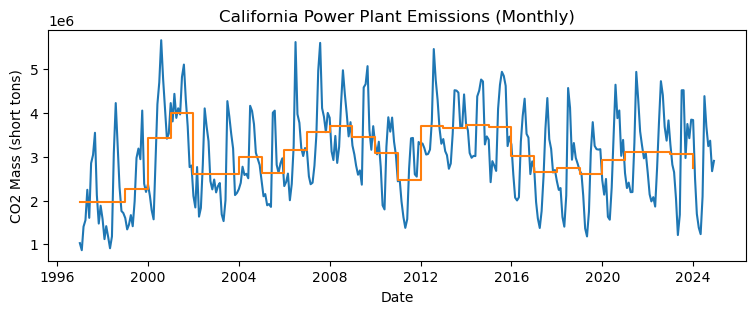

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': 'California Power Plant Emissions (Monthly)'}, xlabel='Date', ylabel='CO2 Mass (short tons)'>)

In [10]:
plot_feature(features_of_interest[0])

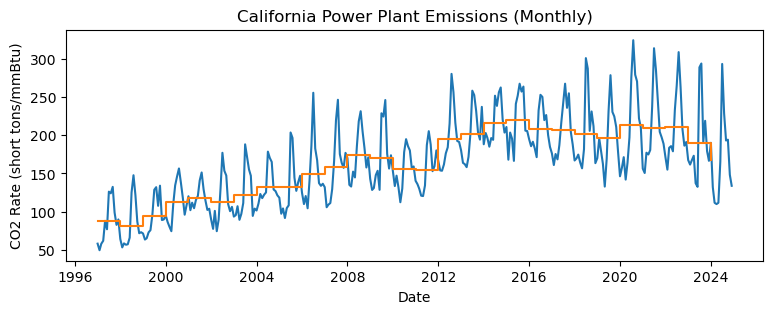

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': 'California Power Plant Emissions (Monthly)'}, xlabel='Date', ylabel='CO2 Rate (short tons/mmBtu)'>)

In [11]:
plot_feature(features_of_interest[1])

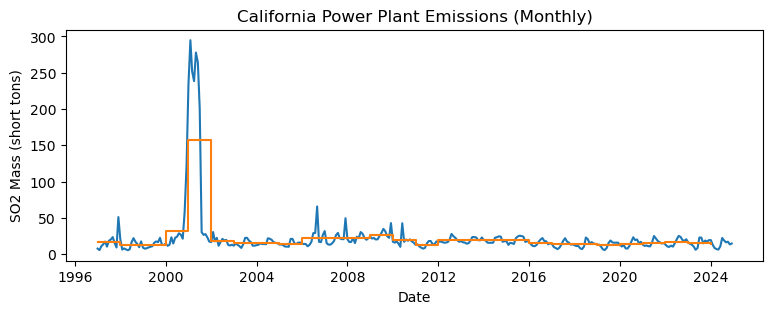

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': 'California Power Plant Emissions (Monthly)'}, xlabel='Date', ylabel='SO2 Mass (short tons)'>)

In [12]:
plot_feature(features_of_interest[2])

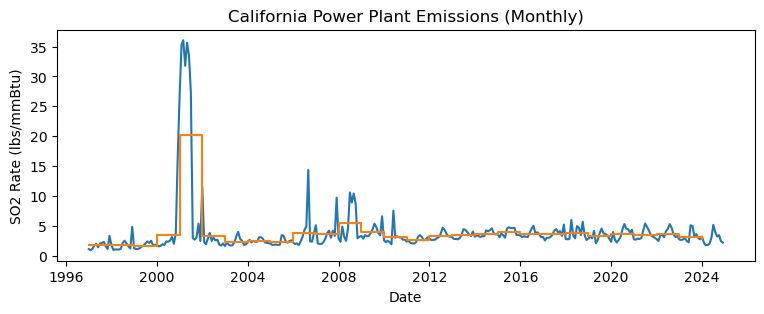

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': 'California Power Plant Emissions (Monthly)'}, xlabel='Date', ylabel='SO2 Rate (lbs/mmBtu)'>)

In [13]:
plot_feature(features_of_interest[3])

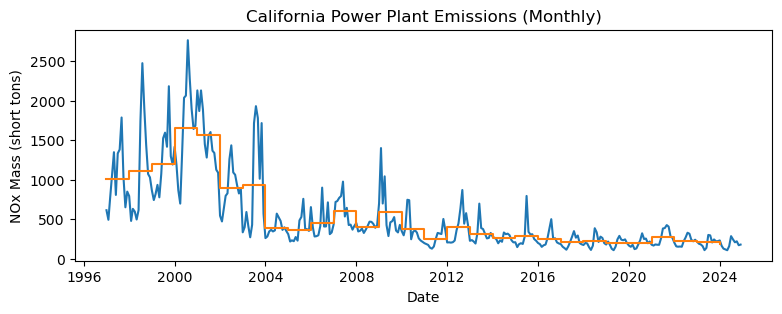

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': 'California Power Plant Emissions (Monthly)'}, xlabel='Date', ylabel='NOx Mass (short tons)'>)

In [14]:
plot_feature(features_of_interest[4])

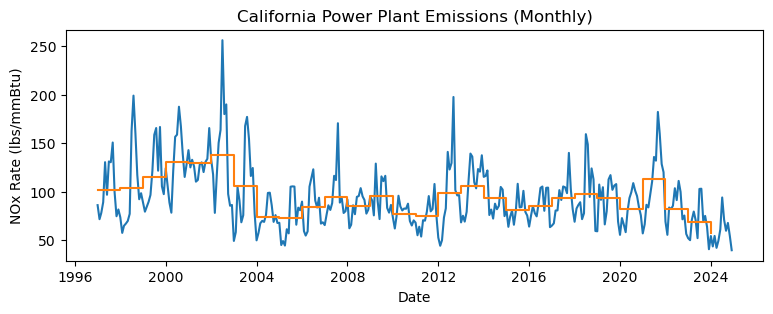

(<Figure size 900x300 with 1 Axes>,
 <Axes: title={'center': 'California Power Plant Emissions (Monthly)'}, xlabel='Date', ylabel='NOx Rate (lbs/mmBtu)'>)

In [15]:
plot_feature(features_of_interest[5])